# Projeto Integrado - Machine Learning

### Importação das Bibliotecas e Entendimento do DataFrame

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/QuantumF/main/credit%20-%20ok.csv',usecols=['Month', 'Customer_ID', 'Age', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan','Credit_History_Age',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'])

In [2]:
df.head(10)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good
5,CUS_0xd40,June,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.43017233,!@9#%8,340.4792118,Good
6,CUS_0xd40,July,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674,Low_spent_Small_value_payments,244.5653167,Good
7,CUS_0xd40,August,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,23.933795,NaN,No,49.574949,24.78521651,High_spent_Medium_value_payments,358.1241676,Standard
8,CUS_0x21b1,January,28_,_______,34847.84,3037.986667,2,4,6,1,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.6906269,Standard
9,CUS_0x21b1,February,28,Teacher,34847.84,3037.986667,2,4,6,1,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123783,High_spent_Large_value_payments,484.5912143,Good


In [3]:
df.shape

(83144, 25)

In [4]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,70703.000000,83144.000000,83144.000000,83144.000000,83144.000000,81528.000000,83144.000000,83144.000000
mean,4193.869821,16.924059,22.301309,73.209191,21.050382,27.681594,32.298935,1380.861140
std,3187.081513,116.875468,128.481073,470.881900,14.841171,192.442884,5.116523,8243.094161
min,319.556250,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1629.773333,3.000000,4.000000,8.000000,10.000000,3.000000,28.063496,30.403233
50%,3081.977500,6.000000,6.000000,13.000000,18.000000,6.000000,32.333159,68.966090
75%,5947.320000,7.000000,7.000000,20.000000,28.000000,9.000000,36.517910,160.321434
max,15204.633330,1798.000000,1499.000000,5789.000000,67.000000,2597.000000,50.000000,82331.000000


In [5]:
quantitative_vars = ['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']
qualitative_vars = ['Month','Occupation','Type_of_Loan','Credit_Mix','Credit_History_Age','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']


In [6]:
def remove_outliers(nome_coluna):
    # Passo 1: Identificar os outliers no DataFrame inteiro com base no IQR
    Q1 = df[nome_coluna].quantile(0.25)
    Q3 = df[nome_coluna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir os limites inferior e superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar os outliers (fora do intervalo)
    outliers = (df[nome_coluna] < lower_bound) | (df[nome_coluna] > upper_bound)

    # Passo 2: Substituir os outliers pela mediana do grupo (customer_id)
    def replace_with_group_median(row):
        if outliers.loc[row.name]:  # Se for outlier
            # Calcular a mediana do grupo de customer_id
            group_median = df[df['Customer_ID'] == row['Customer_ID']][nome_coluna].median()
            return group_median
        else:
            return row[nome_coluna]

    # Aplicar a função para substituir os outliers
    df[nome_coluna] = df.apply(replace_with_group_median, axis=1)

In [7]:
df.describe().round(2)

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,70703.00,83144.00,83144.00,83144.00,83144.00,81528.00,83144.00,83144.00
mean,4193.87,16.92,22.30,73.21,21.05,27.68,32.30,1380.86
std,3187.08,116.88,128.48,470.88,14.84,192.44,5.12,8243.09
min,319.56,-1.00,0.00,1.00,-5.00,0.00,20.00,0.00
25%,1629.77,3.00,4.00,8.00,10.00,3.00,28.06,30.40
50%,3081.98,6.00,6.00,13.00,18.00,6.00,32.33,68.97
75%,5947.32,7.00,7.00,20.00,28.00,9.00,36.52,160.32
max,15204.63,1798.00,1499.00,5789.00,67.00,2597.00,50.00,82331.00


# Tratamento das Colunas

## Coluna Month

In [8]:
month_dummies = pd.get_dummies(df['Month'], drop_first=True)

# Fazendo o one-hot encoded 
df = pd.concat([df, month_dummies], axis=1)

# drop da coluna 'Month' 
df = df.drop('Month', axis=1)

## Coluna Age

In [9]:
#Remover valores não-numéricos da coluna Age
df['Age'] = df['Age'].str.extract(r'([-+]?\d+)').astype(int)

In [10]:
#Visualizar valores incoerentes para Age
df.loc[(df.Age>=90) | (df.Age <=0), 'Age']

2        -500
56       7580
113      -500
122       181
219       995
         ... 
83057    2263
83081    -500
83094    1342
83107    -500
83116    1753
Name: Age, Length: 2287, dtype: int32

In [11]:
#Preencher valores incoerentes da coluna Age com NaN
df.loc[(df.Age>=90) | (df.Age <=0), 'Age'] = pd.NA

In [12]:
#Preencher valores NaN da coluna Age com a mediana da idade do colaborador de acordo com a série histórica
df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda x: x.fillna(x.median())).astype(int)

In [13]:
df.isna().sum()

Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       12441
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 9522
Delay_from_due_date             0
Num_of_Delayed_Payment       5805
Changed_Credit_Limit            0
Num_Credit_Inquiries         1616
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           7485
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3689
Payment_Behaviour               0
Monthly_Balance              1019
Credit_Score                    0
August                          0
February                        0
January                         0
July                            0
June                            0
March         

In [14]:
#Validar Coluna
df.Age.describe()

count    83144.000000
mean        33.337246
std         10.748086
min         14.000000
25%         25.000000
50%         33.000000
75%         42.000000
max         56.000000
Name: Age, dtype: float64

## Coluna Occupation

In [15]:
df['Occupation'].value_counts()

Occupation
_______          5838
Lawyer           5500
Scientist        5268
Architect        5267
Teacher          5237
Mechanic         5207
Media_Manager    5172
Developer        5170
Engineer         5169
Entrepreneur     5147
Doctor           5147
Manager          5083
Accountant       5062
Journalist       5057
Writer           4968
Musician         4852
Name: count, dtype: int64

In [16]:
df.isna().sum()

Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       12441
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 9522
Delay_from_due_date             0
Num_of_Delayed_Payment       5805
Changed_Credit_Limit            0
Num_Credit_Inquiries         1616
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           7485
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3689
Payment_Behaviour               0
Monthly_Balance              1019
Credit_Score                    0
August                          0
February                        0
January                         0
July                            0
June                            0
March         

In [17]:
# Substituir "_______" por "Not Specified"
df['Occupation'] = df['Occupation'].replace('_______', 'NotSpecified_Occupation')

In [18]:
df['Occupation'].value_counts()

Occupation
NotSpecified_Occupation    5838
Lawyer                     5500
Scientist                  5268
Architect                  5267
Teacher                    5237
Mechanic                   5207
Media_Manager              5172
Developer                  5170
Engineer                   5169
Entrepreneur               5147
Doctor                     5147
Manager                    5083
Accountant                 5062
Journalist                 5057
Writer                     4968
Musician                   4852
Name: count, dtype: int64

In [19]:
# Fill NaN com "Not Specified"
df['Occupation'].fillna(0, inplace=True)

C:\Users\paola\AppData\Local\Temp\ipykernel_2856\3841951965.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Occupation'].fillna(0, inplace=True)


In [20]:
occupation_dummies = pd.get_dummies(df['Occupation'], drop_first=True)

# Fazendo one-hot encoded 
df = pd.concat([df, occupation_dummies], axis=1)

# drop da coluna 'Occupation'
df = df.drop('Occupation', axis=1)

In [21]:
df.columns

Index(['Customer_ID', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'August', 'February', 'January', 'July', 'June',
       'March', 'May', 'Architect', 'Developer', 'Doctor', 'Engineer',
       'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic',
       'Media_Manager', 'Musician', 'NotSpecified_Occupation', 'Scientist',
       'Teacher', 'Writer'],
      dtype='object')

In [22]:
df.isna().sum()

Customer_ID                     0
Age                             0
Annual_Income                   0
Monthly_Inhand_Salary       12441
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 9522
Delay_from_due_date             0
Num_of_Delayed_Payment       5805
Changed_Credit_Limit            0
Num_Credit_Inquiries         1616
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           7485
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3689
Payment_Behaviour               0
Monthly_Balance              1019
Credit_Score                    0
August                          0
February                        0
January                         0
July                            0
June                            0
March                           0
May           

## Coluna Annual_Income

In [23]:
# Quais valores existem nessa coluna?
df["Annual_Income"].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [24]:
# Convertendo para float e removendo caracteres indesejados
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '').astype(float)

In [25]:
df.Annual_Income.describe().round(2)

count       83144.00
mean       178235.75
std       1445495.79
min          7005.93
25%         19493.65
50%         37467.18
75%         72588.99
max      24198062.00
Name: Annual_Income, dtype: float64

## Coluna Monthly_Inhand_Salary

In [26]:
df.Monthly_Inhand_Salary.describe()

count    70703.000000
mean      4193.869821
std       3187.081513
min        319.556250
25%       1629.773333
50%       3081.977500
75%       5947.320000
max      15204.633330
Name: Monthly_Inhand_Salary, dtype: float64

In [27]:
# Contagem de valores nulos pré-modificação
df.Monthly_Inhand_Salary.isna().sum()

12441

In [28]:
#Preencher valores NaN da coluna Monthly_Inhand_Salary com a mediana de Monthly_Inhand_Salary do colaborador de acordo com a série histórica
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: x.fillna(x.median()))

In [29]:
# Contagem de valores nulos pós-modificação
df.Monthly_Inhand_Salary.isna().sum()

0

In [30]:
df.Monthly_Inhand_Salary.describe()

count    83144.000000
mean      4196.575679
std       3190.765792
min        319.556250
25%       1630.701667
50%       3081.902500
75%       5947.320000
max      15204.633330
Name: Monthly_Inhand_Salary, dtype: float64

## Coluna Num_Bank_Accounts

In [31]:
# Verificando se Num_Bank_Accounts tem valores negativos
df.Num_Bank_Accounts.describe()

count    83144.000000
mean        16.924059
std        116.875468
min         -1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [32]:
#Tornar valores incoerentes como NaN
df.loc[df.Num_Bank_Accounts < 0, 'Num_Bank_Accounts'] = pd.NA

In [33]:
# Contando NaN
df.Num_Bank_Accounts.isna().sum()

21

In [34]:
#Preencher valores NaN da coluna Num_Bank_Accounts com a mediana de Num_Bank_Accounts do colaborador de acordo com a série histórica
df['Num_Bank_Accounts'] = df.groupby('Customer_ID')['Num_Bank_Accounts'].transform(lambda x: x.fillna(x.median()))

In [35]:
df.Num_Bank_Accounts.isna().sum()

0

In [36]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].astype(int)

## Coluna Num_Credit_Card

In [37]:
df.Num_Credit_Card.describe()

count    83144.000000
mean        22.301309
std        128.481073
min          0.000000
25%          4.000000
50%          6.000000
75%          7.000000
max       1499.000000
Name: Num_Credit_Card, dtype: float64

## Coluna Interest_Rate

In [38]:
df['Interest_Rate'].describe()

count    83144.000000
mean        73.209191
std        470.881900
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max       5789.000000
Name: Interest_Rate, dtype: float64

## Coluna Num_of_Loan

In [39]:
df['Num_of_Loan'].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [40]:
# Convertendo para int
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '').astype(int)

In [41]:
#Tornar valores incoerentes como NaN
df.loc[df.Num_of_Loan < 0, 'Num_of_Loan'] = pd.NA

In [42]:
# Contando NaN
df.Num_of_Loan.isna().sum()

3179

In [43]:
df['Num_of_Loan'].describe()

count    79965.000000
mean         7.277734
std         61.533505
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       1496.000000
Name: Num_of_Loan, dtype: float64

In [44]:
#Preencher valores NaN da coluna Num_of_Loan com a mediana de Num_of_Loan do colaborador de acordo com a série histórica
df['Num_of_Loan'] = df.groupby('Customer_ID')['Num_of_Loan'].transform(lambda x: x.fillna(x.median()))

In [45]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)

In [46]:
# Contando NaN
df.Num_of_Loan.isna().sum()

0

In [47]:
df['Num_of_Loan'].describe()

count    83144.000000
mean         7.133828
std         60.351836
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       1496.000000
Name: Num_of_Loan, dtype: float64

## Coluna Type_of_Loan

In [48]:
df.Type_of_Loan.value_counts()

Type_of_Loan
Not Specified                                                                                                                               1192
Credit-Builder Loan                                                                                                                         1096
Payday Loan                                                                                                                                  992
Mortgage Loan                                                                                                                                992
Student Loan                                                                                                                                 984
                                                                                                                                            ... 
Payday Loan, Personal Loan, Debt Consolidation Loan, Debt Consolidation Loan, Debt Consolidation Loan, and Credit-Bui

In [49]:
#Contagem valores nulos
df.Type_of_Loan.isna().sum()

9522

In [50]:
#Contagem de Dados por tipo
print(df['Type_of_Loan'].apply(type).value_counts())

Type_of_Loan
<class 'str'>      73622
<class 'float'>     9522
Name: count, dtype: int64


In [51]:
#Lista de Customer_ID que possuem Type_of_Loan NaN
df.loc[df['Type_of_Loan'].apply(lambda x: isinstance(x, float)), 'Customer_ID']

32       CUS_0x1cdb
33       CUS_0x1cdb
34       CUS_0x1cdb
35       CUS_0x1cdb
36       CUS_0x1cdb
            ...    
83083    CUS_0xad4f
83084    CUS_0xad4f
83085    CUS_0xad4f
83086    CUS_0xad4f
83087    CUS_0xad4f
Name: Customer_ID, Length: 9522, dtype: object

In [52]:
#Existe algum Customer_ID dos que possuem Type_of_Loan NaN, que possui alguma linha de Type_of_Loan que não seja NaN para usarmos no fillna()?
df[df['Customer_ID'].isin(df.loc[df['Type_of_Loan'].apply(lambda x: isinstance(x, float)), 'Customer_ID'])].Type_of_Loan.unique()

array([nan], dtype=object)

In [53]:
df.Type_of_Loan.fillna("Not Specified",inplace=True)

C:\Users\paola\AppData\Local\Temp\ipykernel_2856\4214394981.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Type_of_Loan.fillna("Not Specified",inplace=True)


In [54]:
df.Type_of_Loan.value_counts()

Type_of_Loan
Not Specified                                                                                                                               10714
Credit-Builder Loan                                                                                                                          1096
Payday Loan                                                                                                                                   992
Mortgage Loan                                                                                                                                 992
Student Loan                                                                                                                                  984
                                                                                                                                            ...  
Payday Loan, Personal Loan, Debt Consolidation Loan, Debt Consolidation Loan, Debt Consolidation Loan, and Cred

In [55]:
#Contagem valores nulos
df.Type_of_Loan.isna().sum()

0

### Splitar Dados

In [56]:
df.shape

(83144, 45)

In [57]:
# One Hot Encoding da variável Type_of_Loan, fazendo strip() das colunas e a concatenação das colunas com nomes semelhantes, mantendo os dados categóricos
dummies = df['Type_of_Loan'].str.replace(r'\s+', '').str.replace('and', '').str.strip().str.get_dummies(sep=',')

dummies.columns = dummies.columns.str.strip()

dummies = dummies.groupby(dummies.columns, axis=1).sum().clip(upper=1)

df = pd.concat([df, dummies], axis=1)

C:\Users\paola\AppData\Local\Temp\ipykernel_2856\2620497681.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  dummies = dummies.groupby(dummies.columns, axis=1).sum().clip(upper=1)


In [58]:
df.columns

Index(['Customer_ID', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'August', 'February', 'January', 'July', 'June',
       'March', 'May', 'Architect', 'Developer', 'Doctor', 'Engineer',
       'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic',
       'Media_Manager', 'Musician', 'NotSpecified_Occupation', 'Scientist',
       'Teacher', 'Writer', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan'],
      

In [59]:
df.shape

(83144, 54)

In [60]:
df.drop(columns=["Type_of_Loan"], inplace=True)

## Coluna Delay_from_due_date

In [61]:
df['Delay_from_due_date'].describe()

count    83144.000000
mean        21.050382
std         14.841171
min         -5.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64

## Coluna Num_of_Delayed_Payment

In [62]:
#Remover valores não-numéricos da coluna Age
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.extract(r'([-+]?\d+)').astype(float)

In [63]:
# Análise das métricas da coluna
df.Num_of_Delayed_Payment.describe()

count    77339.000000
mean        30.432705
std        221.959270
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [64]:
# Preenchendo com 0 onde Num_of_Delayed_Payment é menor que 0 (caso incongruente)
df.loc[df['Num_of_Delayed_Payment']<0,'Num_of_Delayed_Payment'] = 0

In [65]:
df.Num_of_Delayed_Payment.isna().sum()

5805

In [66]:
# Preenche com Mediana
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.fillna(x.median()))

In [67]:
df.Num_of_Delayed_Payment.isna().sum()

0

In [68]:
#Converter em int
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(int)

In [69]:
df['Num_of_Delayed_Payment'].describe()

count    83144.000000
mean        29.251660
std        214.119514
min          0.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

## Coluna Changed_Credit_Limit

In [70]:
df['Changed_Credit_Limit'].describe()

count     83144
unique     3535
top           _
freq       1712
Name: Changed_Credit_Limit, dtype: object

In [71]:
# Convertendo para float
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace('_', "").replace("", 0).astype(float)

In [72]:
df['Changed_Credit_Limit'].value_counts()

Changed_Credit_Limit
 0.00     1715
 8.22      118
 11.32     117
 7.69      104
 9.25      103
          ... 
 26.79       1
-5.50        1
-3.05        1
 21.01       1
 28.17       1
Name: count, Length: 3534, dtype: int64

In [73]:
df['Changed_Credit_Limit'].describe()

count    83144.000000
mean        10.148828
std          6.868965
min         -6.490000
25%          4.950000
50%          9.240000
75%         14.630000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64

## Coluna Num_Credit_Inquiries

In [74]:
# Valores de Num_Credit_Inquiries para os Customer_ID que são NaN em Num_Credit_Inquiries
df[df['Customer_ID'].isin(df[df['Num_Credit_Inquiries'].isna()].Customer_ID)].groupby('Customer_ID')['Num_Credit_Inquiries'].value_counts()

Customer_ID  Num_Credit_Inquiries
CUS_0x1041   10.0                    6
             7.0                     1
CUS_0x105b   0.0                     7
CUS_0x107c   7.0                     7
CUS_0x10a9   4.0                     7
                                    ..
CUS_0xfb4    2275.0                  1
CUS_0xff4    5.0                     6
CUS_0xff6    2.0                     7
CUS_0xffd    7.0                     6
             1801.0                  1
Name: count, Length: 2478, dtype: int64

In [75]:
# Conta o número de valores nulos na coluna 'Num_Credit_Inquiries'
num_nulos = df['Num_Credit_Inquiries'].isna().sum()

# Exibe o resultado
print(f"Número de valores nulos na coluna 'Num_Credit_Inquiries': {num_nulos}")

Número de valores nulos na coluna 'Num_Credit_Inquiries': 1616


#### Agrupando por Customer_ID e verificando se os clientes possuem Num_Credit_Inquiries diferentes

In [76]:
# Agrupa por 'Customer_ID' e conta os valores únicos de 'Num_Credit_Inquiries'
unicos_por_cliente = df.groupby('Customer_ID')['Num_Credit_Inquiries'].nunique()

# Filtra os clientes que têm mais de um valor único de 'Num_Credit_Inquiries'
clientes_com_valores_diferentes = unicos_por_cliente[unicos_por_cliente > 1]

# Exibe os resultados
print(f"Número de clientes com múltiplos valores diferentes de 'Num_Credit_Inquiries': {len(clientes_com_valores_diferentes)}")
print(clientes_com_valores_diferentes)

Número de clientes com múltiplos valores diferentes de 'Num_Credit_Inquiries': 6528
Customer_ID
CUS_0x1000    2
CUS_0x1009    2
CUS_0x100b    3
CUS_0x1011    2
CUS_0x1015    2
             ..
CUS_0xfe4     2
CUS_0xfe5     2
CUS_0xff3     2
CUS_0xffc     2
CUS_0xffd     2
Name: Num_Credit_Inquiries, Length: 6528, dtype: int64


In [77]:
df.Num_Credit_Inquiries.describe()

count    81528.000000
mean        27.681594
std        192.442884
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64

In [78]:
# Preenche com Mediana por Customer_ID
df['Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x: x.fillna(x.median()))

In [79]:
# Altera os valores de 'Num_Credit_Inquiries' menores que 0 para 0
df.loc[df['Num_Credit_Inquiries'] < 0, 'Num_Credit_Inquiries'] = 0

In [80]:
df.Num_Credit_Inquiries.isna().sum()

0

In [81]:
df.Num_Credit_Inquiries.describe()

count    83144.000000
mean        27.255484
std        190.588327
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64

In [82]:
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype(int)

In [83]:
df.isna().sum()

Customer_ID                    0
Age                            0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          7485
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     3689
Payment_Behaviour              0
Monthly_Balance             1019
Credit_Score                   0
August                         0
February                       0
January                        0
July                           0
June                           0
March                          0
May                            0
Architect                      0
Developer 

## Coluna Credit_Mix

In [84]:
df['Credit_Mix'].unique()
# 0 - Not Specified
# 1 - good
# 2 - Standard
# 3 - Bad

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [85]:
df['Credit_Mix'] = df['Credit_Mix'].str.replace('_', "Not Specified")

In [86]:
mapping = {"Not Specified": 0 , "Bad" : 1, "Standard": 2, "Good": 3 }
df["Credit_Mix"] = df['Credit_Mix'].map(mapping)

In [87]:
df['Credit_Mix'].value_counts()

Credit_Mix
2    30281
3    20243
0    16890
1    15730
Name: count, dtype: int64

## Coluna Outstanding_Debt

In [88]:
df['Outstanding_Debt'].value_counts()

Outstanding_Debt
1360.45     24
1151.7      23
1109.03     23
1377.16     16
503.23      16
            ..
1265.83_     1
407.44_      1
702.16_      1
1722.61_     1
1235.48_     1
Name: count, Length: 11007, dtype: int64

In [89]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', "").replace("", 0).astype(float)

In [90]:
df['Outstanding_Debt'].describe()

count    83144.000000
mean      1424.704732
std       1155.185801
min          0.540000
25%        566.980000
50%       1166.080000
75%       1941.730000
max       4998.070000
Name: Outstanding_Debt, dtype: float64

## Coluna Credit_Utilization_Ratio

In [91]:
df.Credit_Utilization_Ratio.describe()

count    83144.000000
mean        32.298935
std          5.116523
min         20.000000
25%         28.063496
50%         32.333159
75%         36.517910
max         50.000000
Name: Credit_Utilization_Ratio, dtype: float64

In [92]:
df.Credit_Utilization_Ratio.isna().sum()

0

## Coluna Credit_History_Age

In [93]:
#Extraindo apenas Número de "Years" da Coluna 'Credit_History_Age'
df["Credit_History_Years"] = df['Credit_History_Age'].str[:2].astype(float)

In [94]:
# Verificar diferentes "Years" que um Customer possui no Histórico
df.groupby("Customer_ID").Credit_History_Years.value_counts()

Customer_ID  Credit_History_Years
CUS_0x1000   10.0                    8
CUS_0x1009   30.0                    6
             31.0                    1
CUS_0x100b   15.0                    7
CUS_0x1011   15.0                    8
                                    ..
CUS_0xff4    18.0                    7
CUS_0xff6    24.0                    8
CUS_0xffc    12.0                    4
             13.0                    2
CUS_0xffd    18.0                    8
Name: count, Length: 16516, dtype: int64

In [95]:
# Contagem de valores nulos pré-modificação
df.Credit_History_Years.isna().sum()

7485

In [96]:
# Preenchendo com NaN onde os "Years" do Histórico são maior do que a Idade do Customer (caso impossível)
df.loc[df.Age<df.Credit_History_Years,['Credit_History_Years','Credit_History_Age']] = pd.NA

In [97]:
# Validação das métricas da coluna
df.Credit_History_Years.describe()

count    67877.000000
mean        16.963611
std          8.077823
min          0.000000
25%         11.000000
50%         17.000000
75%         23.000000
max         33.000000
Name: Credit_History_Years, dtype: float64

In [98]:
# Contagem de valores nulos pós-modificação
df.Credit_History_Years.isna().sum()

15267

In [99]:
#Preencher valores NaN da coluna Credit_History_Years com a mediana de Credit_History_Years do colaborador de acordo com a série histórica
df['Credit_History_Years'] = df.groupby('Customer_ID')['Credit_History_Years'].transform(lambda x: x.fillna(x.median()))

c:\Users\paola\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\paola\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\paola\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\paola\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\paola\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\p

In [100]:
df.Credit_History_Years.describe()

count    75152.000000
mean        17.011337
std          8.069493
min          0.000000
25%         11.000000
50%         17.000000
75%         23.000000
max         33.000000
Name: Credit_History_Years, dtype: float64

In [101]:
# Contagem de valores nulos pré-modificação
df.Credit_History_Years.isna().sum()

7992

In [102]:
# Fillna das linhas restantes que possuem valores NaN na coluna Credit_History_Years com 0 anos
df.Credit_History_Years.fillna(0, inplace=True)

C:\Users\paola\AppData\Local\Temp\ipykernel_2856\2211960277.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Credit_History_Years.fillna(0, inplace=True)


In [103]:
# Contagem de valores nulos pós-modificação
df.Credit_History_Years.isna().sum()

0

In [104]:
df.Credit_History_Years.describe()

count    83144.000000
mean        15.376167
std          9.165174
min          0.000000
25%          8.000000
50%         16.000000
75%         22.000000
max         33.000000
Name: Credit_History_Years, dtype: float64

In [105]:
df.Credit_History_Years = df.Credit_History_Years.astype(int)

In [106]:
df.drop("Credit_History_Age",axis=1,inplace=True)

## Coluna Payment_of_Min_Amount

In [107]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    43545
No     29627
NM      9972
Name: count, dtype: int64

In [108]:
mapping_payment = {"NM": 0 , "No" : 1, "Yes": 2}
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map(mapping_payment)

In [109]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
2    43545
1    29627
0     9972
Name: count, dtype: int64

## Coluna Total_EMI_per_month

In [110]:
df['Total_EMI_per_month'].describe()

count    83144.000000
mean      1380.861140
std       8243.094161
min          0.000000
25%         30.403233
50%         68.966090
75%        160.321434
max      82331.000000
Name: Total_EMI_per_month, dtype: float64

## Coluna Amount_invested_monthly

In [111]:
#Contagem de Dados por tipo: Quem é string?
print(df['Amount_invested_monthly'].apply(type).value_counts())

Amount_invested_monthly
<class 'str'>      79455
<class 'float'>     3689
Name: count, dtype: int64


In [112]:
#Que tipo de dado está guardado como string?
df.loc[df['Amount_invested_monthly'].apply(lambda x: isinstance(x, str)), 'Amount_invested_monthly']

0        80.41529544
1        118.2802216
2        81.69952126
3        199.4580744
4        41.42015309
            ...     
83139    60.97133256
83140    54.18595029
83141    24.02847745
83142    251.6725822
83143    167.1638652
Name: Amount_invested_monthly, Length: 79455, dtype: object

In [113]:
# Valores de Num_Credit_Inquiries para os Customer_ID que são Nan em Num_Credit_Inquiries
df[df['Customer_ID'].isin(df[df['Amount_invested_monthly'].isna()].Customer_ID)].groupby('Customer_ID')['Amount_invested_monthly'].value_counts()

Customer_ID  Amount_invested_monthly
CUS_0x100b   174.2875978                1
             397.2418458                1
             424.0032051                1
             617.0792665                1
             661.6240479                1
                                       ..
CUS_0xff6    361.4180691                1
             519.9507182                1
             534.0885272                1
             978.7857865                1
             __10000__                  1
Name: count, Length: 21375, dtype: int64

In [114]:
#Os valores que são str são únicos para o Customer_ID ou existem mais para podermos pegar a mediana?
df[df['Customer_ID'].isin(df.loc[df['Amount_invested_monthly'].apply(lambda x: isinstance(x, str)), 'Customer_ID'])].groupby('Customer_ID')['Amount_invested_monthly'].value_counts()

Customer_ID  Amount_invested_monthly
CUS_0x1000   109.0565188                1
             114.8024006                1
             176.1325667                1
             191.8347675                1
             244.750283                 1
                                       ..
CUS_0xffd    234.3549399                1
             257.9896935                1
             336.1302311                1
             42.57571979                1
             47.00737873                1
Name: count, Length: 78947, dtype: int64

In [115]:
# Filtra as linhas onde 'Amount_invested_monthly' é igual a 10000
quantidade_10000 = df[df['Amount_invested_monthly'] == '__10000__']

# Conta o número de linhas que possuem o valor 10000
quantidade = len(quantidade_10000)

# Exibe o resultado
print(f"Quantidade de linhas com o valor _10000_ em 'Amount_invested_monthly': {quantidade}")

Quantidade de linhas com o valor _10000_ em 'Amount_invested_monthly': 3581


In [116]:
#Preencher o valor estranho da coluna Amount_invested_monthly com NaN
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('__10000__', pd.NA)

In [117]:
# Contagem de valores nulos
df['Amount_invested_monthly'].isna().sum()

7270

In [118]:
# Converte os valores para numéricos, substituindo erros com NaN
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

# Preenche com Mediana por Customer_ID
df['Amount_invested_monthly'] = df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.fillna(x.median()))

In [119]:
#Contagem de Dados por tipo
print(df['Amount_invested_monthly'].apply(type).value_counts())

Amount_invested_monthly
<class 'float'>    83144
Name: count, dtype: int64


In [120]:
# Contagem de valores nulos
df['Amount_invested_monthly'].isna().sum()

0

In [121]:
df['Amount_invested_monthly'].describe()

count    83144.000000
mean       193.973364
std        195.766011
min          0.000000
25%         73.619322
50%        129.450922
75%        234.211811
max       1977.326102
Name: Amount_invested_monthly, dtype: float64

## Coluna Payment_Behaviour

In [122]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [123]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('!@9#%8', "Not Specified")

In [124]:
mapping_Payment_Behaviour = {"Not Specified": 0 , "Low_spent_Small_value_payments" : 1, "Low_spent_Medium_value_payments": 2, "Low_spent_Large_value_payments": 3, "High_spent_Small_value_payments":4, "High_spent_Medium_value_payments":5, "High_spent_Large_value_payments" : 6}
df["Payment_Behaviour"] = df['Payment_Behaviour'].map(mapping_Payment_Behaviour)

In [125]:
df[ "Payment_Behaviour"].value_counts()

Payment_Behaviour
1    21251
5    14589
2    11457
6    11336
4     9492
3     8693
0     6326
Name: count, dtype: int64

## Coluna Monthly_Balance

In [126]:
#Contagem de Dados por tipo: Quem é string?
print(df['Monthly_Balance'].apply(type).value_counts())

Monthly_Balance
<class 'str'>      82125
<class 'float'>     1019
Name: count, dtype: int64


In [127]:
#Os valores que são inconrguentes em Monthly_Balance são únicos para o Customer_ID ou existem mais para podermos pegar a mediana?
df[df['Customer_ID'].isin(df[df['Monthly_Balance'] == '__-333333333333333333333333333__']['Customer_ID'])].groupby('Customer_ID')['Monthly_Balance'].value_counts()

Customer_ID  Monthly_Balance                 
CUS_0x288d   180.1037738                         1
             203.5331435                         1
             233.5290854                         1
             262.4055737                         1
             313.0902154                         1
             392.3144327                         1
             397.6738774                         1
             __-333333333333333333333333333__    1
CUS_0x2b77   229.790345                          1
             323.631745                          1
             334.066376                          1
             360.6670413                         1
             363.9752507                         1
             368.9197569                         1
             374.0432734                         1
             __-333333333333333333333333333__    1
CUS_0x57f3   255.7418171                         1
             442.4259366                         1
             532.7563138            

In [128]:
#Preencher o valor estranho da coluna Monthly_Balance com NaN
df['Monthly_Balance'] = df['Monthly_Balance'].replace('__-333333333333333333333333333__', pd.NA)

In [129]:
# Contagem de valores nulos
df['Monthly_Balance'].isna().sum()

1026

In [130]:
# Customer_ID que possuem NaN
df[df['Monthly_Balance'].isna()].Customer_ID

197      CUS_0xa5f9
314      CUS_0x571f
388      CUS_0x9b3c
456      CUS_0x9d78
457      CUS_0x9d78
            ...    
82964    CUS_0x40ad
82983    CUS_0x8788
82996    CUS_0x3048
82998    CUS_0x3048
83071    CUS_0x2654
Name: Customer_ID, Length: 1026, dtype: object

In [131]:
# Valores de Monthly_Balance para os Customer_ID que são Nan em Monthly_Balance
df[df['Customer_ID'].isin(df[df['Monthly_Balance'].isna()].Customer_ID)].groupby('Customer_ID')['Monthly_Balance'].value_counts()

Customer_ID  Monthly_Balance
CUS_0x1057   386.2202155        1
             474.5989926        1
             491.5287627        1
             636.4224715        1
             639.3172545        1
                               ..
CUS_0xff6    592.0056862        1
             734.6761443        1
             755.5507002        1
             909.0397093        1
             936.5327603        1
Name: count, Length: 5534, dtype: int64

In [132]:
# Converte os valores para numéricos, substituindo erros com NaN
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

# Preenche com Mediana por Customer_ID
df['Monthly_Balance'] = df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.fillna(x.median()))


In [133]:
#Contagem de Dados por tipo
print(df['Monthly_Balance'].apply(type).value_counts())

Monthly_Balance
<class 'float'>    83144
Name: count, dtype: int64


In [134]:
df['Monthly_Balance'].isna().sum()

0

In [135]:
df['Monthly_Balance'].describe()

count    83144.000000
mean       403.252988
std        214.330961
min          0.088628
25%        270.416249
50%        337.237873
75%        470.706094
max       1602.040519
Name: Monthly_Balance, dtype: float64

## Coluna Credit_Score

In [136]:
df.Credit_Score.unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [137]:
df.Credit_Score = df.Credit_Score.map({'Poor':0,'Standard':1,'Good':2})

# Análise descritiva

In [138]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns   # Número de colunas numéricas

### Informações gerais

Preparamos os dados para que tivéssemos apenas valores numéricamente interpretáveis

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83144 entries, 0 to 83143
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               83144 non-null  object 
 1   Age                       83144 non-null  int32  
 2   Annual_Income             83144 non-null  float64
 3   Monthly_Inhand_Salary     83144 non-null  float64
 4   Num_Bank_Accounts         83144 non-null  int32  
 5   Num_Credit_Card           83144 non-null  int64  
 6   Interest_Rate             83144 non-null  int64  
 7   Num_of_Loan               83144 non-null  int32  
 8   Delay_from_due_date       83144 non-null  int64  
 9   Num_of_Delayed_Payment    83144 non-null  int32  
 10  Changed_Credit_Limit      83144 non-null  float64
 11  Num_Credit_Inquiries      83144 non-null  int32  
 12  Credit_Mix                83144 non-null  int64  
 13  Outstanding_Debt          83144 non-null  float64
 14  Credit

In [140]:
df.describe().round(2)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Credit_History_Years
count,83144.00,83144.00,83144.00,83144.00,83144.00,83144.00,83144.00,83144.00,83144.00,83144.00,...,83144.00,83144.00,83144.00,83144.00,83144.00,83144.00,83144.00,83144.00,83144.00,83144.00
mean,33.34,178235.75,4196.58,16.92,22.30,73.21,7.13,21.05,29.25,10.15,...,0.31,0.32,0.31,0.31,0.31,0.43,0.32,0.31,0.31,15.37
std,10.75,1445495.79,3190.77,116.88,128.48,470.88,60.35,14.84,214.12,6.87,...,0.46,0.47,0.46,0.46,0.46,0.50,0.47,0.46,0.46,9.16
min,14.00,7005.93,319.56,0.00,0.00,1.00,0.00,-5.00,0.00,-6.49,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,25.00,19493.65,1630.70,3.00,4.00,8.00,2.00,10.00,9.00,4.95,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.00
50%,33.00,37467.18,3081.90,6.00,6.00,13.00,3.00,18.00,14.00,9.24,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.00
75%,42.00,72588.99,5947.32,7.00,7.00,20.00,5.00,28.00,18.00,14.63,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,22.00
max,56.00,24198062.00,15204.63,1798.00,1499.00,5789.00,1496.00,67.00,4397.00,36.97,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,33.00


### Distribuição das variáveis

#### Antes da remoção de outliers

In [141]:
def plot_dist():

  # Ajustando o número de subplots dinamicamente
  num_plots = len(numerical_cols)
  num_cols = 4  # Número de colunas por linha
  num_rows = (num_plots + num_cols - 1) // num_cols  # Calcula quantas linhas serão necessárias

  plt.figure(figsize=(20, num_rows * 4))  # Ajusta o tamanho da figura com base no número de linhas
  for i, col in enumerate(numerical_cols, 1):
      plt.subplot(num_rows, num_cols, i)
      sns.histplot(df[col], kde=True)
      plt.title(f'Distribuição de {col}')

  plt.tight_layout()
  plt.show()


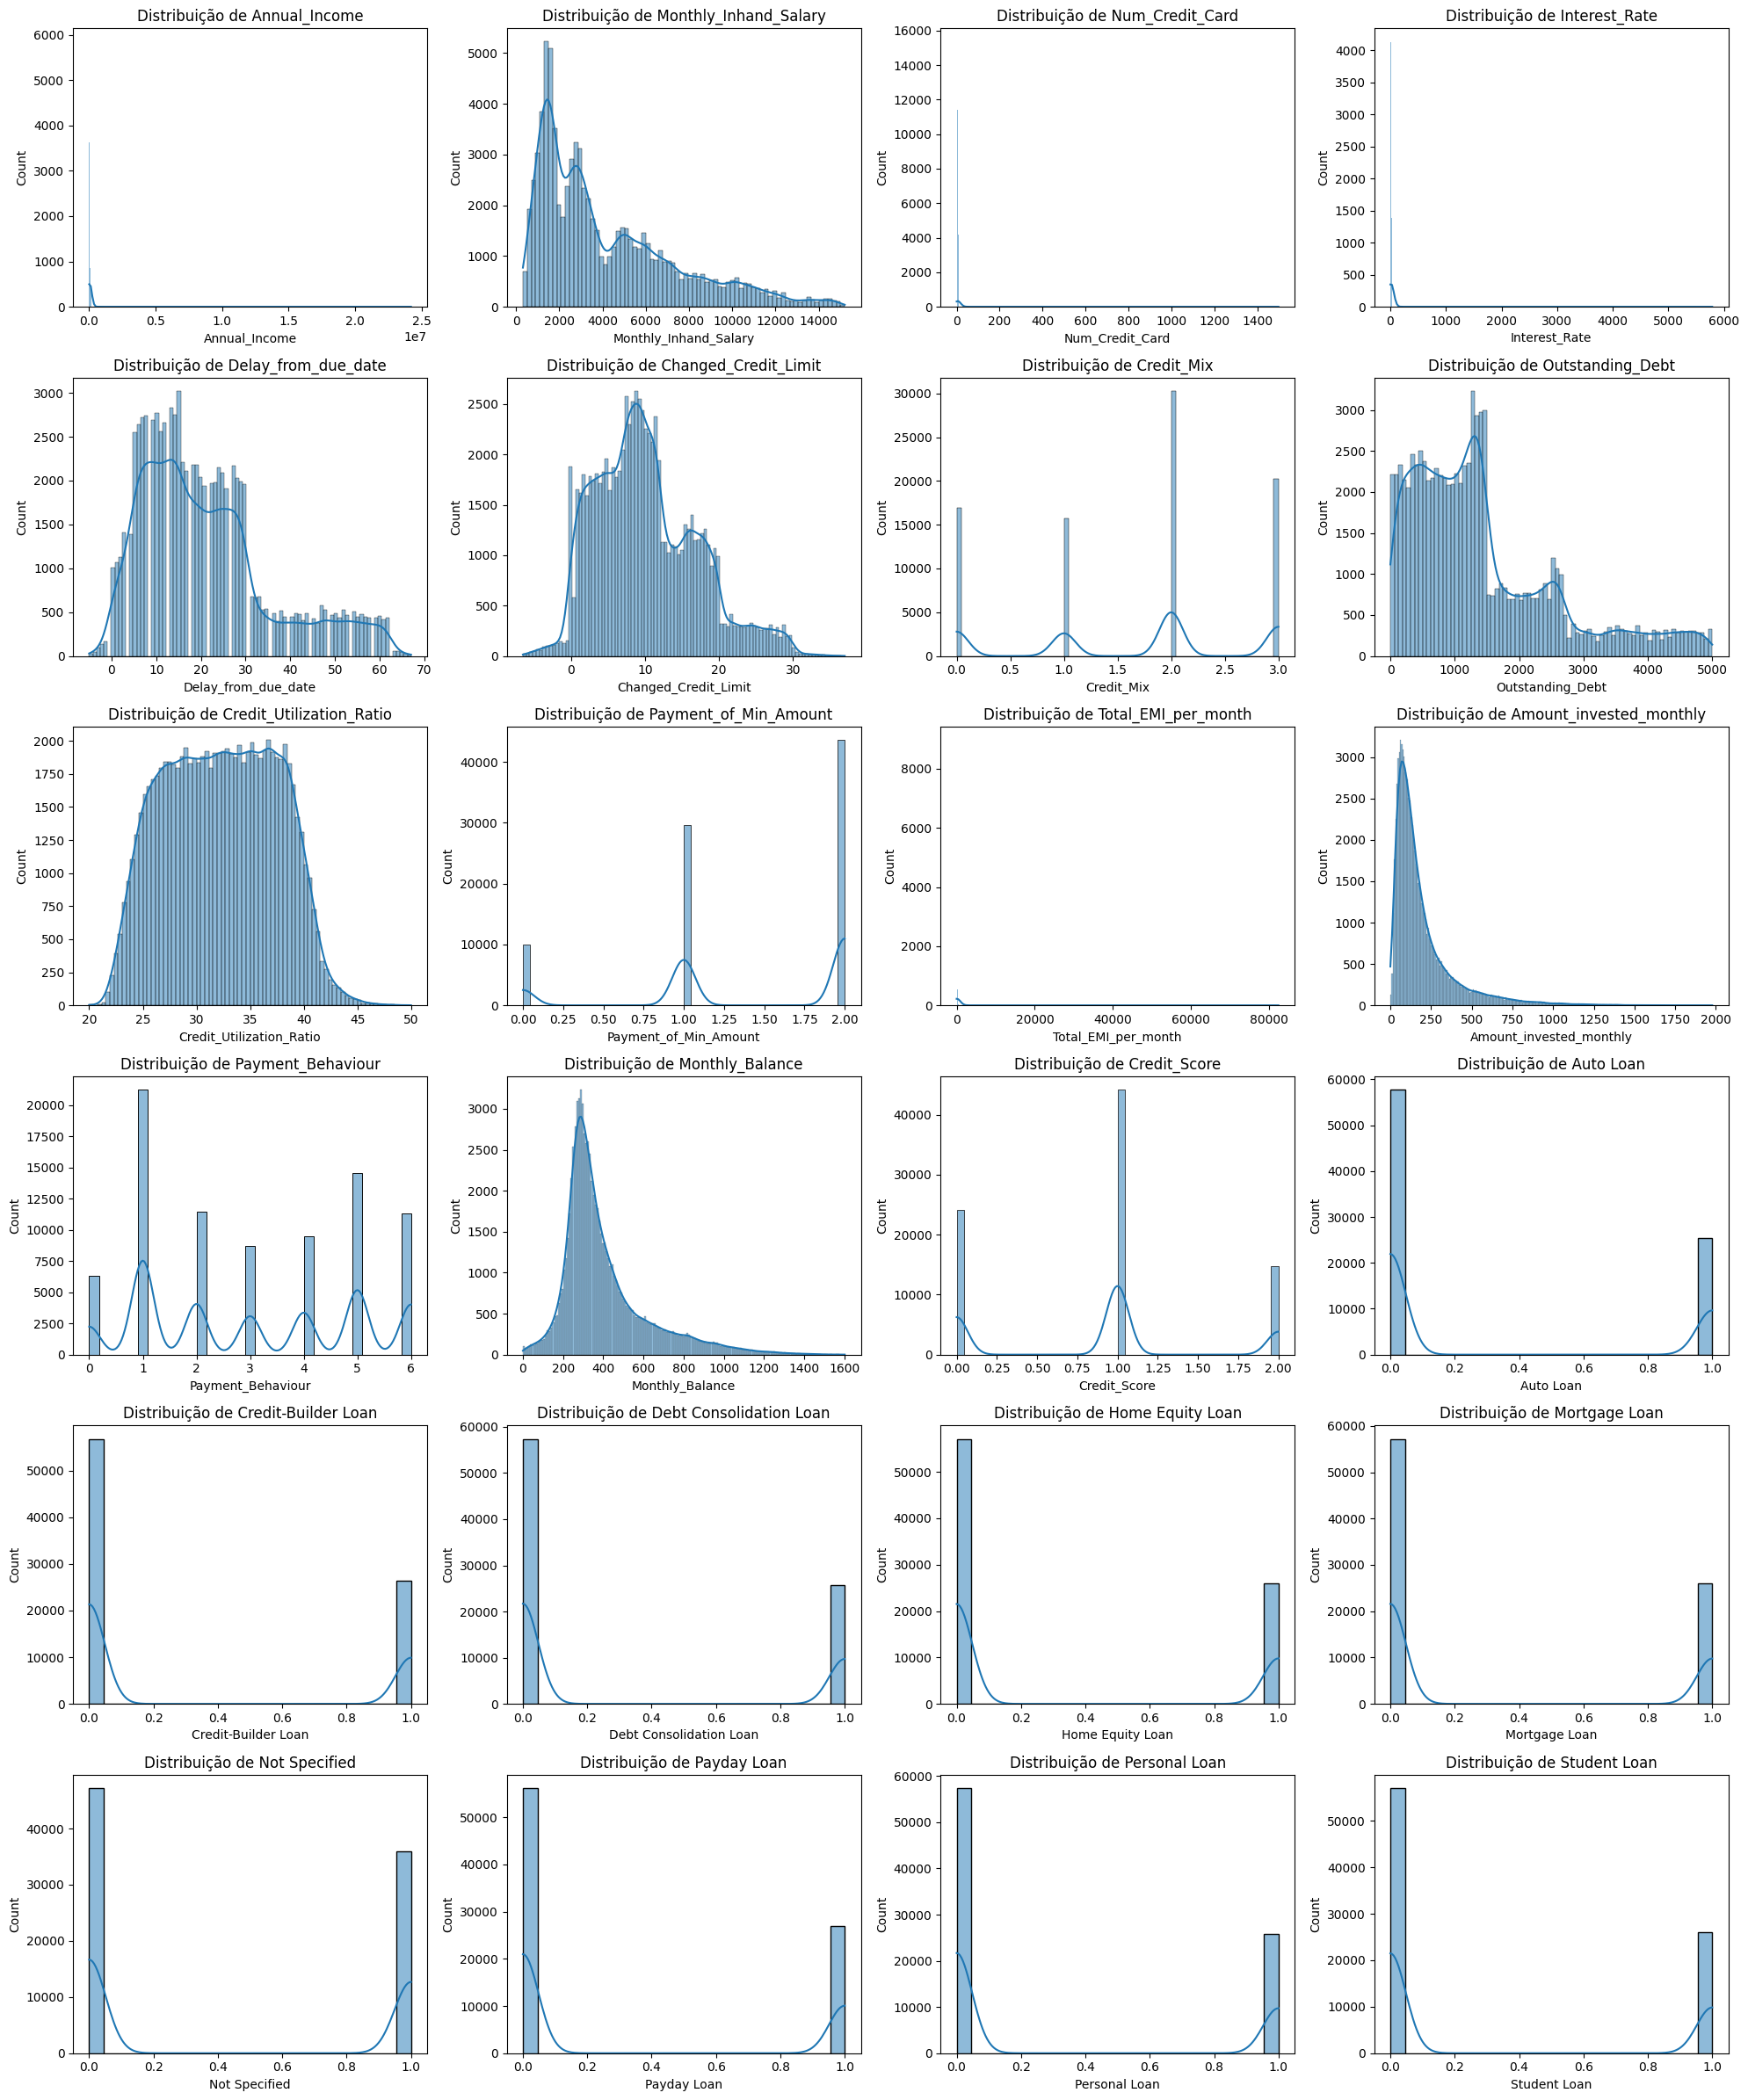

In [142]:
plot_dist()

#### Outliers
Sua remoção visa garantir a integridade e a eficácia do modelo de Machine Learning, aproximando a distribuição e comportamento das variáveis da realidade

In [143]:
#Removendo outliers
for column in ['Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Num_Credit_Inquiries','Outstanding_Debt','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']:
    remove_outliers(column)

#### Após da remoção de outliers

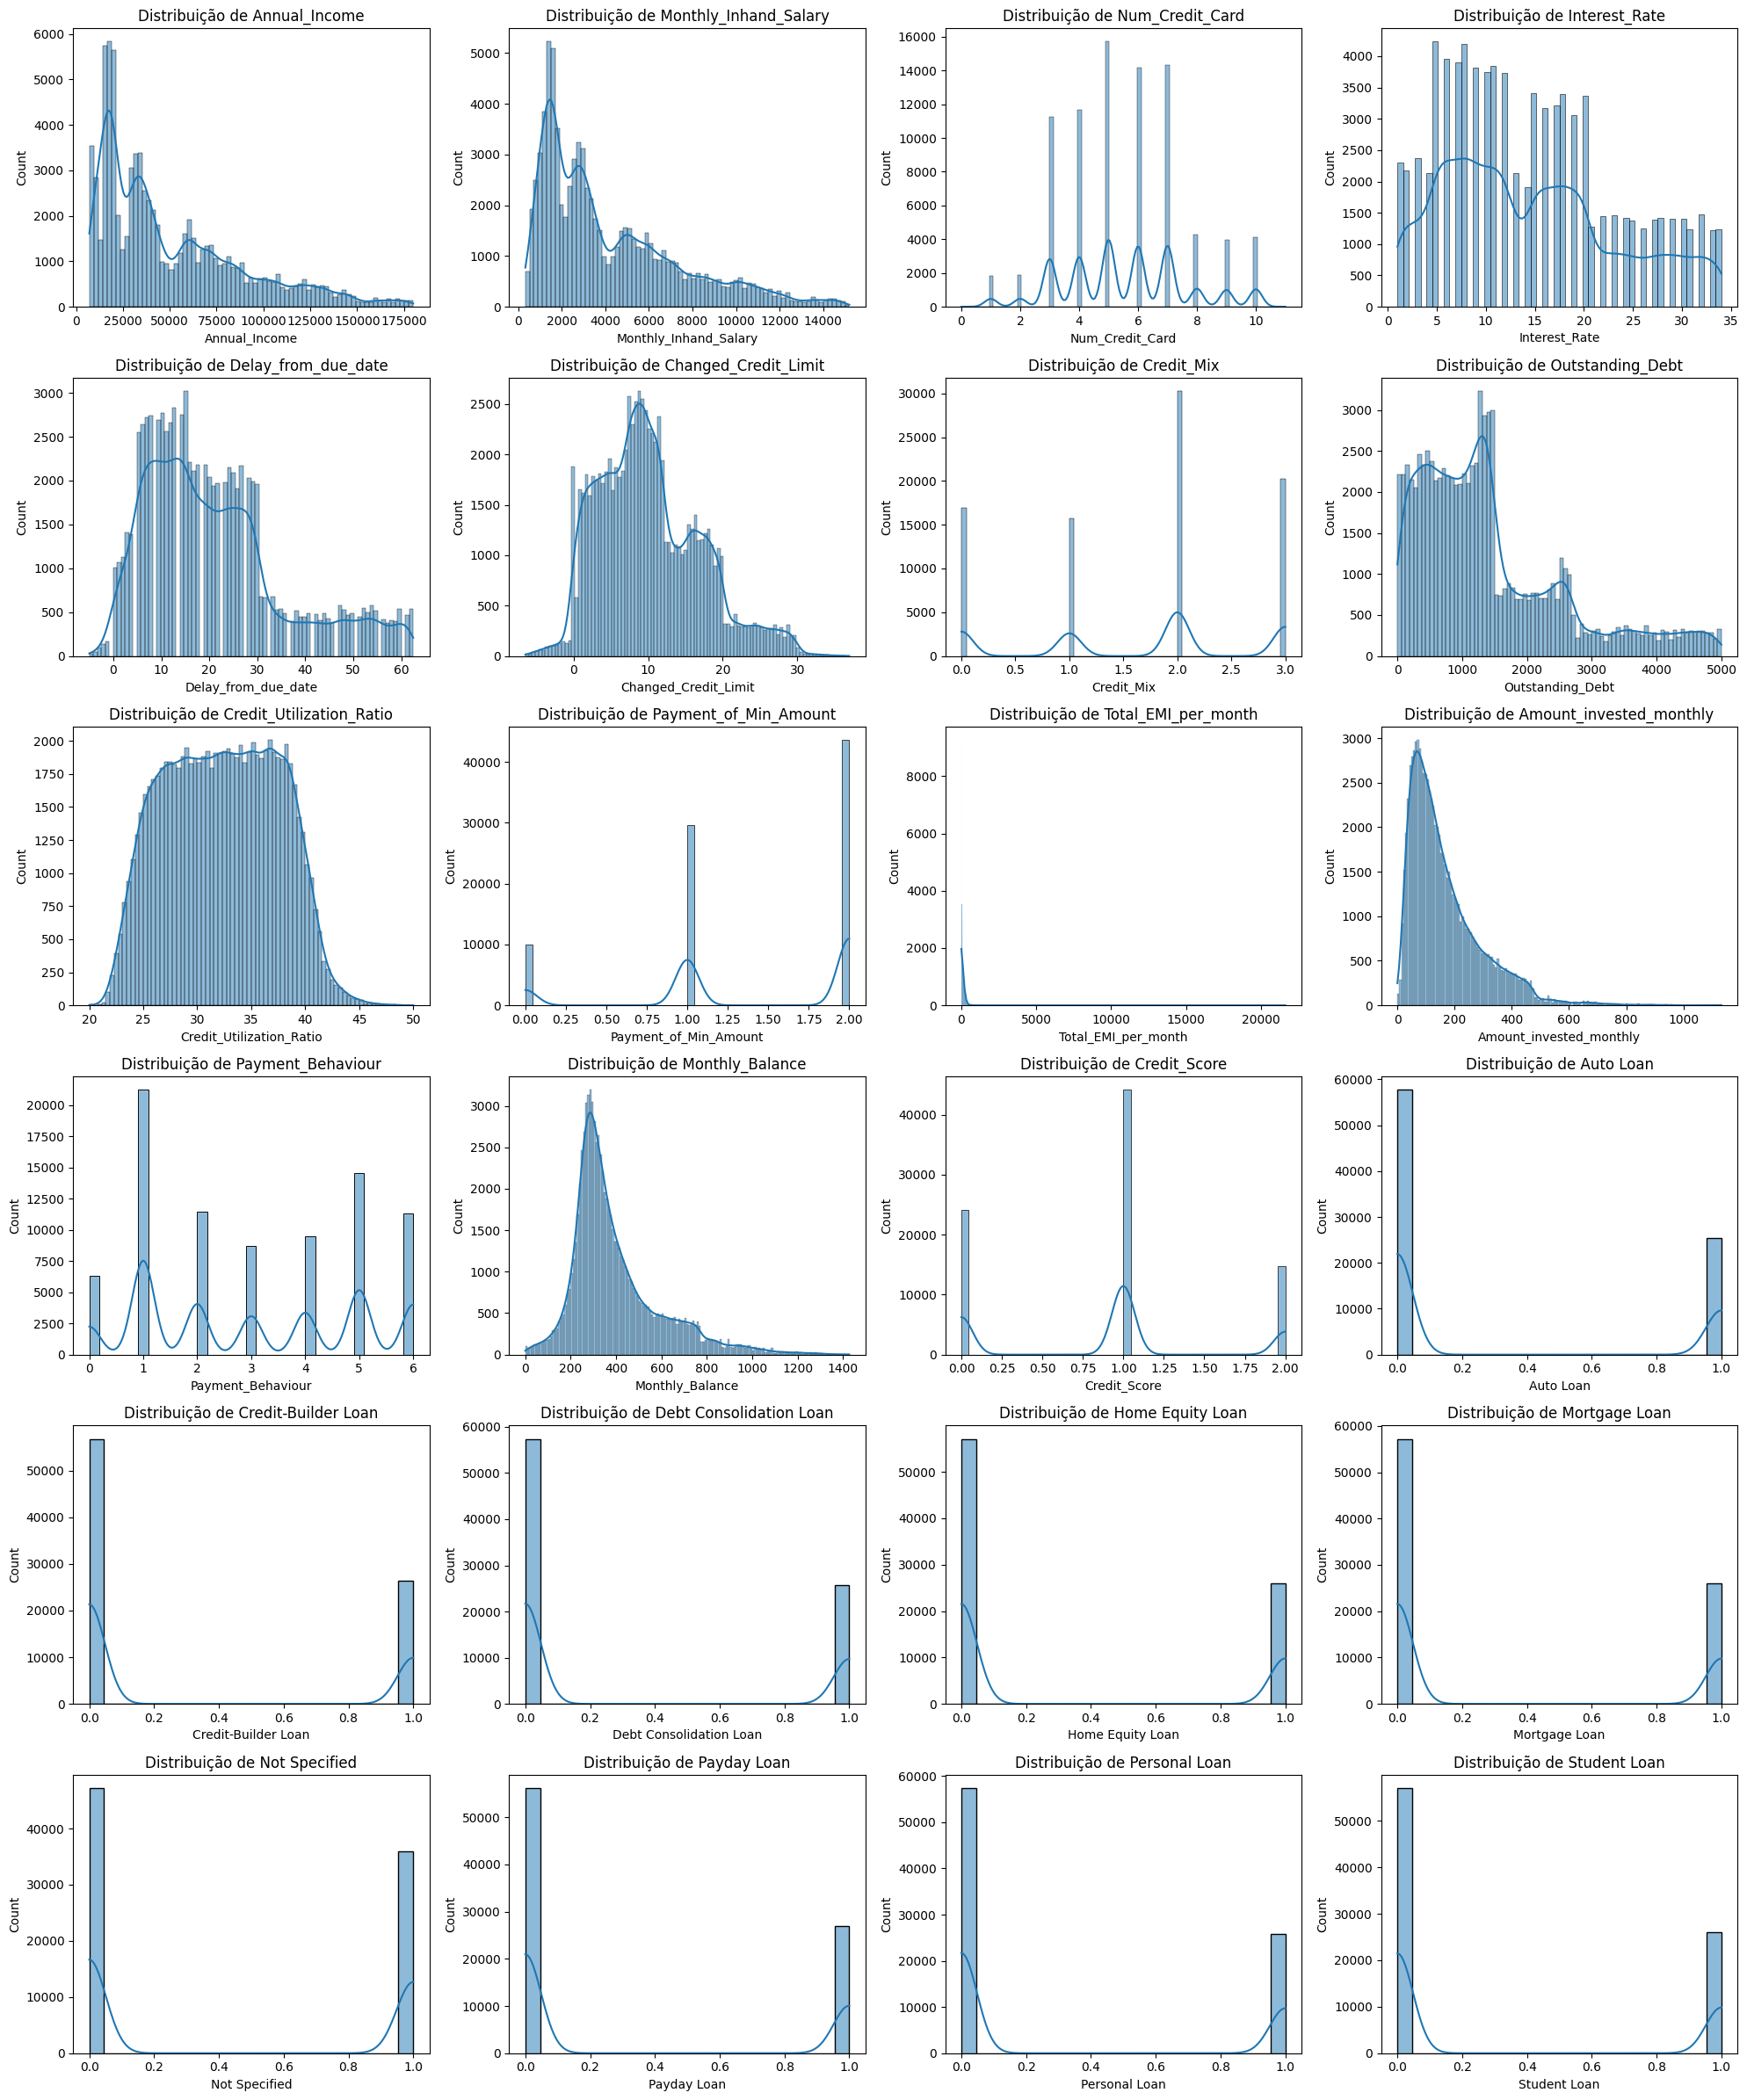

In [144]:
plot_dist()

C:\Users\paola\AppData\Local\Temp\ipykernel_2856\877380698.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")  # Usando uma paleta de cores do seaborn
C:\Users\paola\AppData\Local\Temp\ipykernel_2856\877380698.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")  # Usando uma paleta de cores do seaborn
C:\Users\paola\AppData\Local\Temp\ipykernel_2856\877380698.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")  # Usando uma paleta de cores do 

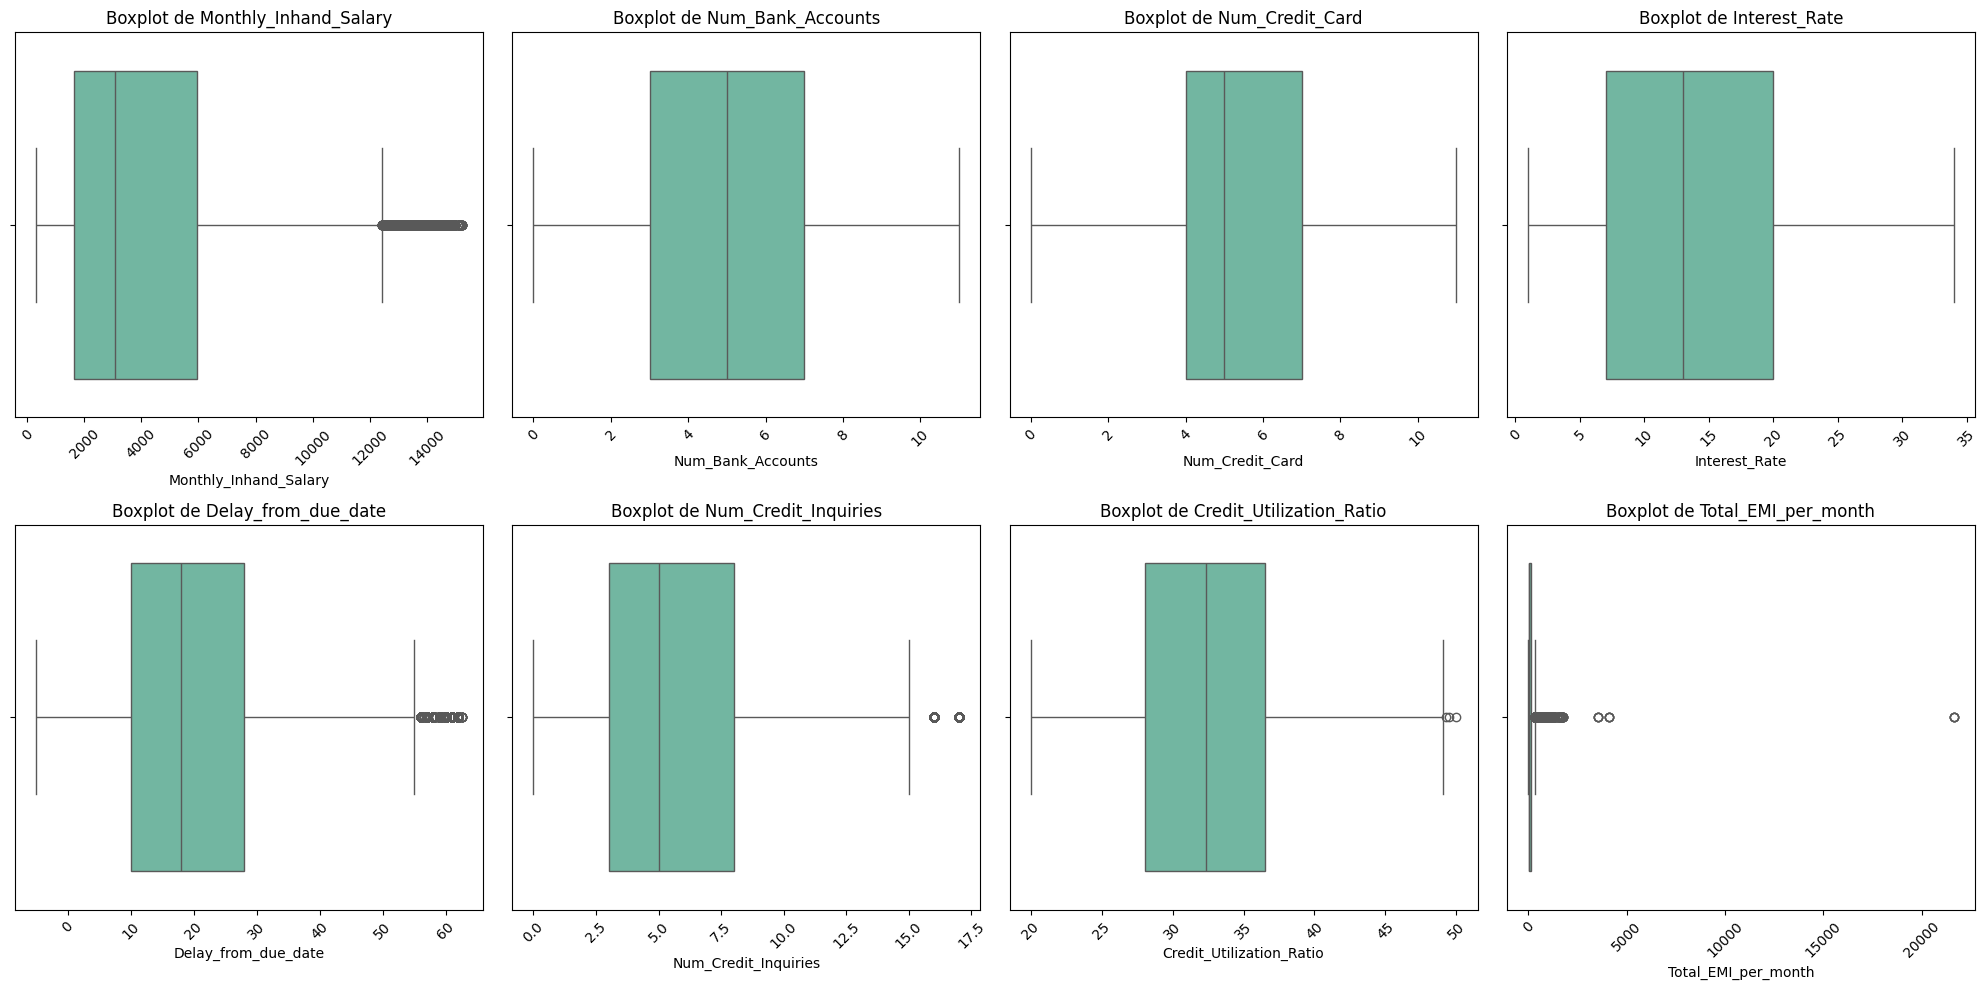

In [145]:
# Definindo as variáveis relevantes p/ box-plot
relevant_cols = [
    'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
    'Credit_Utilization_Ratio', 'Total_EMI_per_month'
]

# Configurando o layout para exibir vários box plots lado a lado
num_cols = 4  # Número de box plots por linha
num_rows = (len(relevant_cols) + num_cols - 1) // num_cols  # Calcula o número de linhas

# Definindo o tamanho da figura
plt.figure(figsize=(20, num_rows * 5))  # Tamanho ajustado para evitar sobreposição

# Loop para gerar os box plots de cada variável relevante
for i, col in enumerate(relevant_cols, 1):
    plt.subplot(num_rows, num_cols, i)

    # Estilizando com seaborn
    sns.boxplot(data=df, x=col, palette="Set2")  # Usando uma paleta de cores do seaborn
    plt.title(f'Boxplot de {col}', fontsize=12)  # Ajustando o tamanho da fonte do título

    # Rotacionando os labels do eixo x (se necessário)
    plt.xticks(rotation=45)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibindo os plots
plt.show()


Possíveis outliers remanescentes em EMI_per_month...?

### Resumo do dataset

In [146]:
df.describe().round(2)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Credit_History_Years
count,83144.00,83144.00,83144.00,83144.00,83144.00,83144.00,83144.00,83144.00,83144.00,83144.00,...,83144.00,83144.00,83144.00,83144.00,83144.00,83144.00,83144.00,83144.00,83144.00,83144.00
mean,33.34,50482.96,4196.58,5.36,5.54,14.52,3.54,21.03,13.30,10.15,...,0.31,0.32,0.31,0.31,0.31,0.43,0.32,0.31,0.31,15.37
std,10.75,38349.23,3190.81,2.59,2.07,8.74,2.44,14.80,6.29,6.87,...,0.46,0.47,0.46,0.46,0.46,0.50,0.47,0.46,0.46,9.16
min,14.00,7005.93,319.56,0.00,0.00,1.00,0.00,-5.00,0.00,-6.49,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,25.00,19396.50,1630.70,3.00,4.00,7.00,2.00,10.00,9.00,4.95,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.00
50%,33.00,36943.76,3081.90,5.00,5.00,13.00,3.00,18.00,14.00,9.24,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.00
75%,42.00,71619.74,5947.32,7.00,7.00,20.00,5.00,28.00,18.00,14.63,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,22.00
max,56.00,179987.28,15204.63,11.00,11.00,34.00,9.00,62.50,28.00,36.97,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,33.00


#### Excluindo a coluna Customer_ID, já que não possui valor semântico

In [147]:
df.drop(columns=['Customer_ID'], inplace=True)

### Correlação

Utilizaremos todas as variáveis numéricas para construir um heatmap entre elas a fim de identificar a correlação visualmente

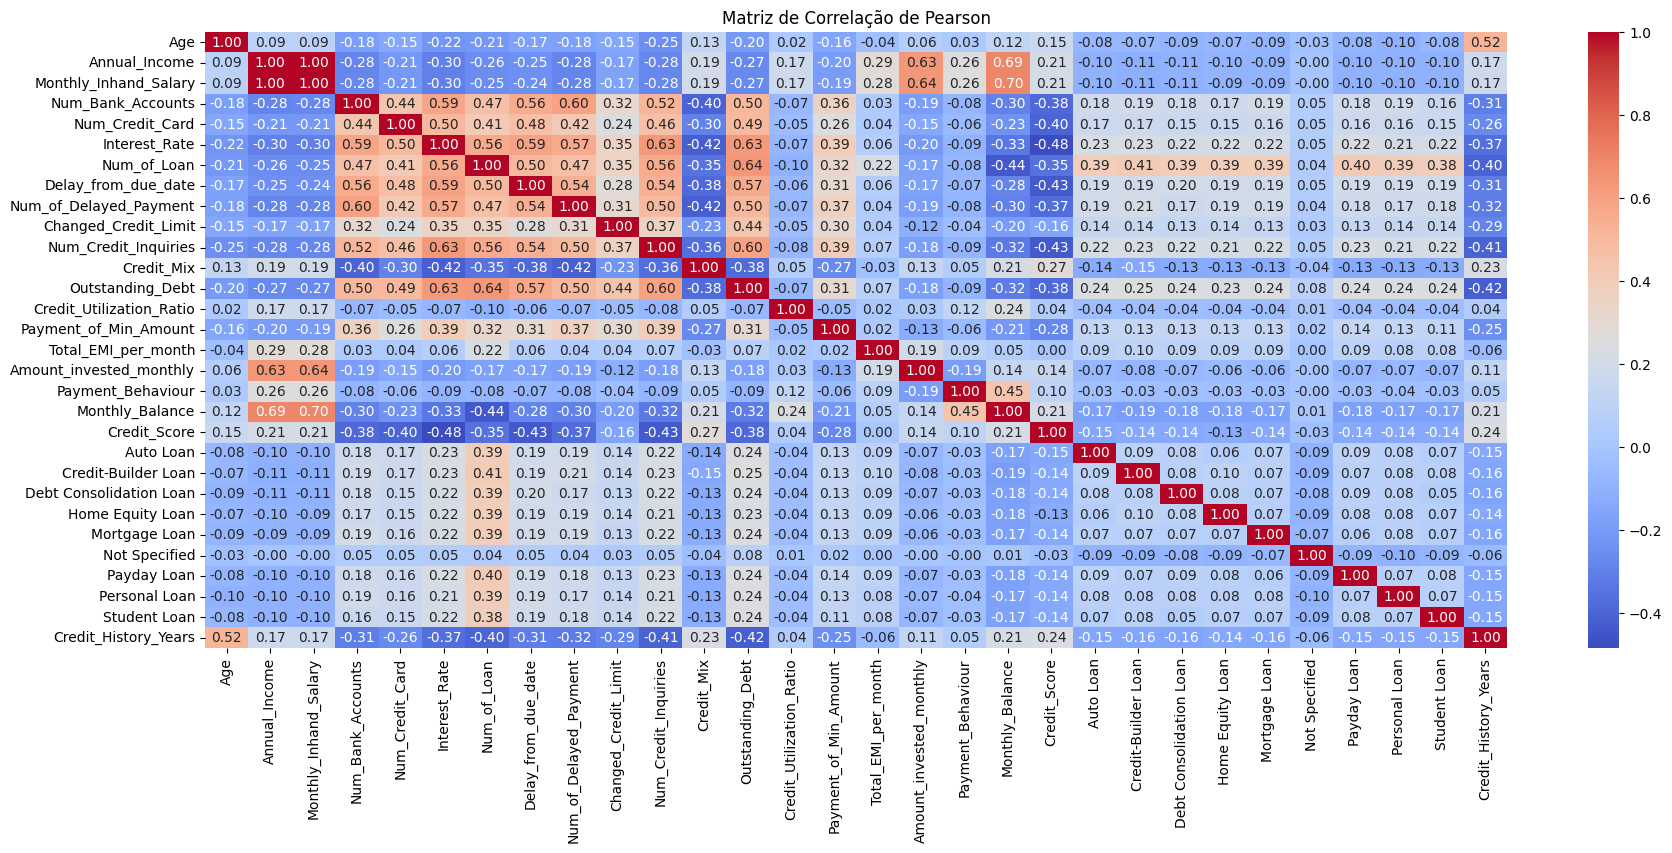

In [148]:
# Visualizar a matriz de correlação usando um heatmap
plt.figure(figsize=(21, 8))
sns.heatmap(df.drop(columns=['August', 'February', 'January', 'July', 'June',
       'March', 'May', 'Architect', 'Developer', 'Doctor', 'Engineer',
       'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic',
       'Media_Manager', 'Musician', 'NotSpecified_Occupation', 'Scientist',
       'Teacher', 'Writer']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação de Pearson')
plt.show()

Vamos tentar identificar multicolinearidado entre variáveis utilizando o **Coeficiente Variance Inflation Factor - VIF**

In [149]:
#Identificando variáveis com alta multicolinearidade
# Coeficiente Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

mc_X = df[numerical_cols].dropna()  # Removendo valores ausentes para o cálculo
vif_data = pd.DataFrame()
vif_data['Feature'] = mc_X.columns
vif_data['VIF'] = [variance_inflation_factor(mc_X.values, i) for i in range(len(mc_X.columns))]

print("\nMulticolinearidade - Variance Inflation Factor (VIF):")
print(vif_data)


Multicolinearidade - Variance Inflation Factor (VIF):
                     Feature         VIF
0              Annual_Income  781.246861
1      Monthly_Inhand_Salary  784.240341
2            Num_Credit_Card   11.538804
3              Interest_Rate    8.476714
4        Delay_from_due_date    5.578175
5       Changed_Credit_Limit    4.154764
6                 Credit_Mix    4.019299
7           Outstanding_Debt    5.766406
8   Credit_Utilization_Ratio   24.451115
9      Payment_of_Min_Amount    6.242722
10       Total_EMI_per_month    1.615220
11   Amount_invested_monthly    7.050515
12         Payment_Behaviour    4.748751
13           Monthly_Balance   16.681042
14              Credit_Score    3.522202
15                 Auto Loan    1.595128
16       Credit-Builder Loan    1.638302
17   Debt Consolidation Loan    1.592260
18          Home Equity Loan    1.608394
19             Mortgage Loan    1.600112
20             Not Specified    1.943566
21               Payday Loan    1.642294
22

Percebemos que valores altos como
**Monthly_Balance   17.674919 Annual_Income  810.883057 e Monthly_Inhand_Salary  804.795548** indicam presença de variáveis que trazem os mesmos dados, ou informações análogas

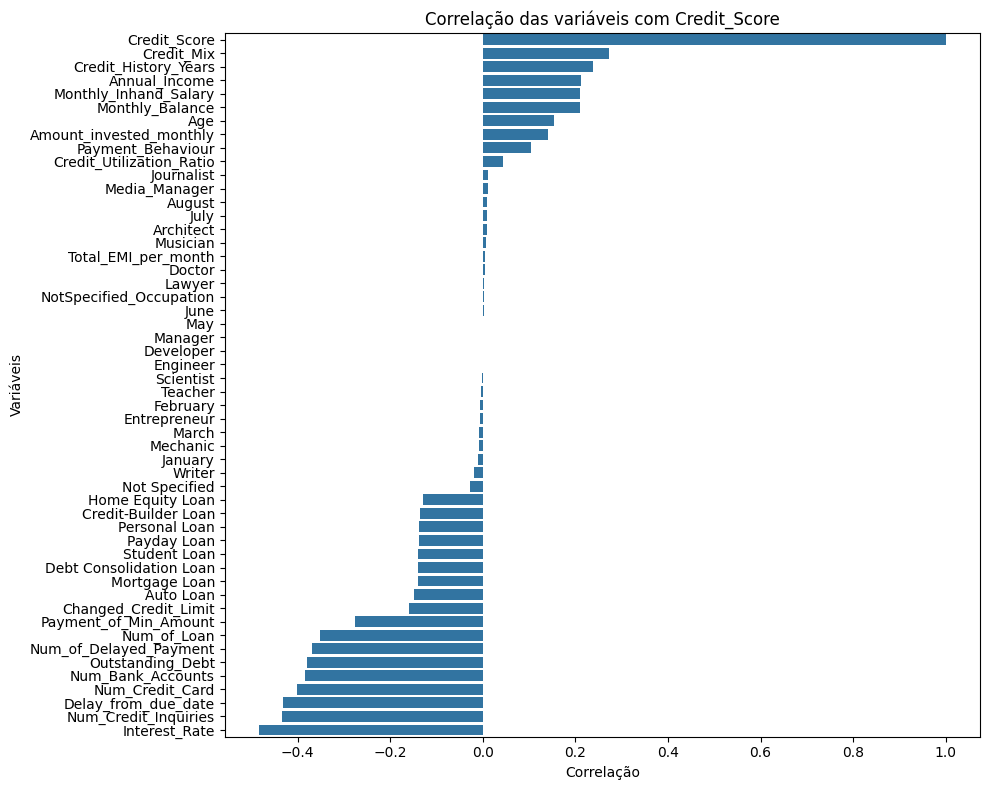

In [150]:
# Calculando a correlação com a variável alvo 'Credit_Score'
target_col = 'Credit_Score' #Variável alvo
correlation_with_target = df.corr()[target_col].sort_values(ascending=False)

# Visualizando a correlação com um gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index)
plt.title(f'Correlação das variáveis com {target_col}')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

In [151]:
# Resumo final da análise descritiva
print("\nResumo Final da Análise descritiva das variáveis:")
print(df.describe(include='all'))


Resumo Final da Análise descritiva das variáveis:
                 Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count   83144.000000   83144.000000           83144.000000       83144.000000   
unique           NaN            NaN                    NaN                NaN   
top              NaN            NaN                    NaN                NaN   
freq             NaN            NaN                    NaN                NaN   
mean       33.337246   50482.963577            4196.578516           5.359334   
std        10.748086   38349.234439            3190.811629           2.592239   
min        14.000000    7005.930000             319.556250           0.000000   
25%        25.000000   19396.500000            1630.701667           3.000000   
50%        33.000000   36943.760000            3081.902500           5.000000   
75%        42.000000   71619.740000            5947.320000           7.000000   
max        56.000000  179987.280000           15204.633330

### Interpretação da análise descritiva

Análise Descritiva Interpretativa
1. **Monthly Inhand Salary (Salário Mensal Recebido)**
O salário mensal médio recebido pelos clientes é de aproximadamente R 4.193,87, com uma mediana de R 3.081,98. Isso indica uma leve assimetria positiva na distribuição dos salários, sugerindo que a maioria dos clientes ganha menos do que a média, enquanto alguns ganham salários significativamente maiores, elevando a média. O valor mínimo de 319,56 pode sugerir indivíduos com empregos temporários ou de baixa renda, enquanto o valor máximo de  15.204,63 indica a presença de clientes de alta renda.

2. **Num Bank Accounts (Número de Contas Bancárias)**
O número de contas bancárias por cliente tem uma média de 16,92, com uma mediana de 6. Esse valor médio parece desproporcionalmente alto, e a diferença entre a média e a mediana indica a presença de outliers. O número máximo de contas é 1.798, o que é anormalmente alto, sugerindo possíveis erros de entrada de dados. Esse fato justifica uma inspeção mais detalhada ou limpeza dos dados para tratar esses valores extremos.

3. **Interest Rate (Taxa de Juros)**
A taxa de juros média observada entre os clientes é de 73,21%, mas a mediana é muito mais baixa, em torno de 13%. A grande discrepância entre a média e a mediana aponta para a presença de outliers severos, uma vez que o valor máximo registrado é 5.789%. Isso indica que uma pequena parcela de clientes pode estar enfrentando condições financeiras desfavoráveis, talvez com créditos de alto risco ou maus históricos de crédito.

4. **Credit Utilization Ratio (Razão de Utilização de Crédito)**
A razão média de utilização de crédito entre os clientes é de 32,30%, o que sugere que, em média, os clientes estão utilizando cerca de um terço do crédito disponível para eles. Este é um valor considerado saudável, já que a maioria dos credores recomenda manter essa razão abaixo de 30%. Contudo, é importante monitorar os clientes que estão com valores próximos ao limite para evitar problemas de endividamento.

5. **Num Credit Inquiries (Número de Consultas de Crédito)**
O número médio de consultas de crédito é moderado, com a maioria dos clientes tendo apenas algumas consultas recentes, o que é considerado normal no processo de avaliação de crédito. Valores muito altos nesse campo podem sinalizar um comportamento arriscado, onde o cliente pode estar buscando crédito excessivamente, o que pode impactar negativamente o score de crédito.

6. **Total EMI per Month (Total de Parcelas Mensais)**
O total médio de pagamentos mensais (EMI - Equated Monthly Installment) entre os clientes é de R$ 1.286,54. Esse valor sugere que, em média, os clientes têm um nível de endividamento razoável com relação à sua renda mensal. Contudo, há alguns clientes cujas parcelas mensais excedem significativamente a média, indicando uma possível pressão financeira sobre esses indivíduos. A distribuição dos valores pode ser explorada mais profundamente para identificar aqueles que estão em situação de risco.



### **Conclusão Geral**
As variáveis analisadas indicam um grupo diversificado de clientes em termos de condições financeiras. Existem discrepâncias consideráveis entre a média e a mediana em várias variáveis, sugerindo a presença de outliers que merecem atenção. Alguns clientes apresentam indicadores de alto risco, como uma alta razão de utilização de crédito, número elevado de contas bancárias e parcelas mensais excessivamente altas. Uma limpeza dos dados, especialmente em relação aos outliers, é recomendada para melhorar a precisão das análises subsequentes.

# Modelo(s)

In [152]:
# Separar as variáveis explicativas (X) e a variável-alvo (y)
X = df.drop(columns=['Credit_Score'])  # Removendo a coluna alvo dos dados explicativos
y = df['Credit_Score']  # Coluna que queremos prever

# Verificando se há dados nulos no conjunto de dados
print(X.isna().sum())
print(y.isna().sum())

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar a forma dos dados para garantir que tudo está correto
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")



Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
August                      0
February                    0
January                     0
July                        0
June                        0
March                       0
May                         0
Architect                   0
Developer                   0
Doctor                      0
Engineer                    0
Entrepreneur                0
Journalist                  0
Lawyer                      0
Manager   

### Random Forest Classifier

In [153]:
# Criar o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators= 1400,min_samples_split= 5,min_samples_leaf= 1,max_features= 'sqrt',max_depth= 36,bootstrap= False, random_state=42, n_jobs=-1)

# Treinar o modelo com o conjunto de treino amostrado
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste amostrado
y_pred = rf_model.predict(X_test)

# Avaliar o desempenho do modelo amostrado
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      7327
           1       0.82      0.82      0.82     13188
           2       0.79      0.74      0.76      4429

    accuracy                           0.81     24944
   macro avg       0.80      0.80      0.80     24944
weighted avg       0.81      0.81      0.81     24944

Acurácia: 80.72%


In [154]:
rf_model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 36,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 1400,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

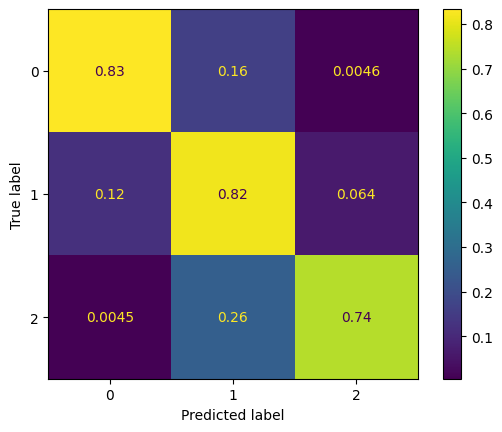

In [155]:
matrix = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                              display_labels=rf_model.classes_)
disp.plot()
plt.show()

#### Tune de Hiperparâmetros com RandomizedSearchCV

In [156]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(2, 40, num = 20)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}


# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation,
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)

# rf_random.best_params_

### Regressão Logística

In [157]:
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df.drop(columns=['Credit_Score']))

X = df_normalized
y = df['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6345413726747915
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.51      0.58      7327
           1       0.64      0.77      0.70     13188
           2       0.56      0.42      0.48      4429

    accuracy                           0.63     24944
   macro avg       0.62      0.57      0.59     24944
weighted avg       0.63      0.63      0.63     24944



# Análise e comparação dos modelos

Comparação dos Relatórios de Classificação
**negrito**
Ao analisar os dois relatórios de classificação apresentados, observamos diferenças significativas nas métricas de desempenho do modelo, refletindo variações na eficácia da predição em um conjunto de dados com três classes.

1. Acurácia
Relatório 1: 80.72%
Relatório 2: 63.45% **negrito**
A acurácia do primeiro modelo é significativamente maior (80.72%) em comparação com o segundo (63.45%). Essa diferença sugere que o primeiro modelo é mais eficaz em prever corretamente as classes, indicando que ele consegue identificar padrões mais robustos nos dados.

2. Precisão
Classe 0: 0.79 (Relatório 1) vs. 0.67 (Relatório 2)
Classe 1: 0.82 vs. 0.64
Classe 2: 0.79 vs. 0.56 **negrito**
As métricas de precisão mostram uma tendência semelhante, com o primeiro modelo apresentando resultados mais altos em todas as classes. A Classe 1 destaca-se no primeiro relatório, onde 82% das predições são corretas, enquanto no segundo relatório, essa precisão cai para 64%. Essa diminuição sugere que o segundo modelo comete mais erros ao prever a Classe 1, impactando a confiança nas predições.

3. Revocação
Classe 0: 0.83 vs. 0.51
Classe 1: 0.82 vs. 0.77
Classe 2: 0.74 vs. 0.42 **negrito**
A revocação é uma área onde o primeiro modelo se destaca especialmente, com a Classe 0 apresentando 83% de revocação em comparação com apenas 51% no segundo modelo. Isso indica que o primeiro modelo é mais eficaz na identificação de casos positivos dessa classe. Embora a Classe 1 tenha mantido uma revocação razoável (77%) no segundo modelo, a Classe 2 caiu drasticamente de 74% para 42%, evidenciando dificuldades em capturar casos dessa classe no segundo relatório.

4. F1-Score
Classe 0: 0.81 vs. 0.58
Classe 1: 0.82 vs. 0.70
Classe 2: 0.76 vs. 0.48 **negrito**
Os F1-scores, que equilibram precisão e revocação, também mostram um desempenho superior do primeiro modelo. Todos os F1-scores são mais altos no primeiro relatório, especialmente nas Classes 0 e 2, onde a capacidade de identificar corretamente os casos é crítica.

5. Médias Macro e Ponderada
Macro avg (Relatório 1): 0.80 vs. 0.62 (Relatório 2)
Weighted avg (Relatório 1): 0.81 vs. 0.63 (Relatório 2) **negrito**
As médias macro e ponderada corroboram a superioridade do primeiro modelo, que apresenta médias mais altas em todas as métricas, indicando um desempenho geral melhor.

**Conclusão**
Em resumo, *o primeiro relatório (Random Forest) revela um modelo mais robusto, com uma acurácia de **80.72%** e métricas de desempenho superiores **em todas as classes**, enquanto o segundo relatório mostra um desempenho mais fraco, com uma acurácia de apenas 63.45%*. As disparidades nas métricas de precisão, recall e F1-score sugerem que o primeiro modelo é mais capaz de capturar padrões nos dados, enquanto o segundo modelo apresenta desafios significativos, especialmente nas Classes 0 e 2.

Essa comparação destaca a importância de otimizar o modelo e realizar uma análise aprofundada das variáveis e do pré-processamento de dados, a fim de melhorar a eficácia das predições e garantir resultados confiáveis em aplicações práticas.

In [158]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def credit_score_simulator(model, scaler, columns):
    print("Simulador de Score de Crédito\n")

    # Coletando entradas do usuário
    age = int(input("Idade: "))
    occupation = input("Ocupação (ex: Developer, Doctor, etc.): ")
    annual_income = float(input("Renda Anual: "))
    monthly_inhand_salary = float(input("Salário Mensal: "))
    num_bank_accounts = int(input("Número de Contas Bancárias: "))
    num_credit_card = int(input("Número de Cartões de Crédito: "))
    interest_rate = float(input("Taxa de Juros: "))
    num_of_loan = int(input("Número de Empréstimos: "))
    credit_history_years = int(input("Anos de Histórico de Crédito: "))
    delay_from_due_date = int(input("Atraso em dias do pagamento: "))
    num_of_delayed_payment = int(input("Número de Pagamentos Atrasados: "))
    changed_credit_limit = float(input("Alteração no Limite de Crédito: "))
    num_credit_inquiries = int(input("Número de Consultas de Crédito: "))
    outstanding_debt = float(input("Dívida Pendentes: "))
    credit_utilization_ratio = float(input("Razão de Utilização de Crédito: "))
    total_emi_per_month = float(input("EMI Total por Mês: "))
    amount_invested_monthly = float(input("Valor Investido Mensalmente: "))
    monthly_balance = float(input("Saldo Mensal: "))

    # Mapear variáveis categóricas
    occupation_mapping = {
        "Architect": 1, "Developer": 2, "Doctor": 3, "Engineer": 4,
        "Entrepreneur": 5, "Journalist": 6, "Lawyer": 7, "Manager": 8,
        "Mechanic": 9, "Media_Manager": 10, "Musician": 11,
        "NotSpecified_Occupation": 12, "Scientist": 13, "Teacher": 14,
        "Writer": 15
    }

    occupation_encoded = occupation_mapping.get(occupation, 12)  # Valor padrão para "Not Specified"

    # Montando os dados de entrada
    input_data = np.array([[
        age, occupation_encoded, annual_income, monthly_inhand_salary,
        num_bank_accounts, num_credit_card, interest_rate, num_of_loan,
        credit_history_years, delay_from_due_date, num_of_delayed_payment,
        changed_credit_limit, num_credit_inquiries, outstanding_debt,
        credit_utilization_ratio, total_emi_per_month, amount_invested_monthly,
        monthly_balance
    ]])

    # Ajustar os dados de entrada para ter o mesmo número de colunas do modelo
    input_df = pd.DataFrame(input_data, columns=columns[:18])  # Usando as primeiras 18 colunas
    input_df = input_df.reindex(columns=columns, fill_value=0)

    # Normalizar as entradas
    input_data_normalized = scaler.transform(input_df)

    # Fazer a previsão
    prediction = model.predict(input_data_normalized)

    # Interpretar a previsão
    score_mapping = {0: 'Poor', 1: 'Standard', 2: 'Good'}
    print(f"\nO Score de Crédito do cliente é: {score_mapping[prediction[0]]}")

# Chamar o simulador
columns = df.drop(columns=['Credit_Score']).columns
scaler = StandardScaler().fit(df[columns])
credit_score_simulator(rf_model, scaler, columns)

Simulador de Score de Crédito



c:\Users\paola\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



O Score de Crédito do cliente é: Standard
